## loading the required packages

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from ast import literal_eval
from plotly.subplots import make_subplots

## data loading & cleaning

In [18]:
df = pd.read_csv('data/listings.csv')
df2 = pd.read_csv('data/listings-detailed.csv')

df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23911 non-null  int64  
 1   name                            23908 non-null  object 
 2   host_id                         23911 non-null  int64  
 3   host_name                       23906 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23911 non-null  object 
 6   latitude                        23911 non-null  float64
 7   longitude                       23911 non-null  float64
 8   room_type                       23911 non-null  object 
 9   price                           23911 non-null  int64  
 10  minimum_nights                  23911 non-null  int64  
 11  number_of_reviews               23911 non-null  int64  
 12  last_review                     

In [20]:

df2["price"]=df2["price"].apply(lambda x : float(x[1:].replace(",","")))
# df2.drop(df2[df2["price"]>=50000].index,axis=0,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23911 non-null  int64  
 1   listing_url                                   23911 non-null  object 
 2   scrape_id                                     23911 non-null  int64  
 3   last_scraped                                  23911 non-null  object 
 4   name                                          23908 non-null  object 
 5   description                                   23434 non-null  object 
 6   neighborhood_overview                         15120 non-null  object 
 7   picture_url                                   23911 non-null  object 
 8   host_id                                       23911 non-null  int64  
 9   host_url                                      23911 non-null 

In [21]:
df2["amenities"] = df2["amenities"].apply(literal_eval)

In [22]:
exploded_df2 = df2.explode('amenities')

In [23]:
df_new = pd.crosstab(exploded_df2['id'],exploded_df2['amenities']).rename_axis(None,axis=1).add_prefix("amenities_")
df_new

,amenities_ - condiviso con gli ospiti delle altre stanze. refrigerator,amenities_ Bosch induction stove,amenities_ vari marchi di shampoo di buona qualità shampoo,amenities_- body soap,amenities_- refrigerator,amenities_- shampoo,amenities_- stove,amenities_. body soap,amenities_. conditioner,amenities_. oven,...,amenities_Yves Rocher conditioner,amenities_Zagara body soap,amenities_Zagara shampoo,amenities_Zanussi stove,amenities_Zara Home body soap,amenities_Zerowatt oven,amenities_Zoppas induction stove,amenities_Zoppas Clima4 refrigerator,amenities_Zoppas refrigerator,amenities_。 body soap
id,,,,,,,,,,,,,,,,,,,,,
2737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643887148301452676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643892318015714276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643958447866594121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
dict_df = {}
for c in df_new.columns:
	dict_df[c] = df_new[c].value_counts()[1]

In [25]:
sorted_keys = sorted(dict_df, reverse=True, key=dict_df.get)
sorted_dict = {}
for w in sorted_keys:
    sorted_dict[w] = dict_df[w]

In [26]:
df_new = df_new[['amenities_Wifi', 'amenities_Hair dryer', 'amenities_Long term stays allowed',
'amenities_Heating', 'amenities_Breakfast', 'amenities_Air conditioning', 'amenities_Hot water', 'amenities_Iron', 'amenities_TV', 'amenities_Coffee maker', 'amenities_Dedicated workspace', 'amenities_Private entrance']]
df_new

,amenities_Wifi,amenities_Hair dryer,amenities_Long term stays allowed,amenities_Heating,amenities_Breakfast,amenities_Air conditioning,amenities_Hot water,amenities_Iron,amenities_TV,amenities_Coffee maker,amenities_Dedicated workspace,amenities_Private entrance
id,,,,,,,,,,,,
2737,1,1,1,1,0,0,0,1,0,0,0,0
11834,1,1,1,1,0,1,1,1,0,1,0,0
12398,1,1,1,1,0,0,1,1,0,1,1,0
19965,1,1,1,1,0,1,1,1,1,1,1,0
19967,1,1,1,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
643887148301452676,1,0,1,1,0,1,1,1,1,0,0,0
643892318015714276,1,0,1,0,0,1,1,1,1,0,0,0
643958447866594121,1,0,1,0,0,1,1,1,1,0,0,0


In [27]:
df = pd.concat([df.set_index("id"), df_new], axis=1, join='inner').reset_index()
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,amenities_Long term stays allowed,amenities_Heating,amenities_Breakfast,amenities_Air conditioning,amenities_Hot water,amenities_Iron,amenities_TV,amenities_Coffee maker,amenities_Dedicated workspace,amenities_Private entrance
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,...,1,1,0,1,0,1,0,0,1,1
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,...,1,1,1,0,1,1,1,0,0,0
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,...,0,1,1,1,1,0,1,0,0,0
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,...,0,0,0,1,1,1,1,1,1,1
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,...,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,46885223,B/B appartamento in Resort privato aeroporto F...,49598986,Matteo,NaN,X Ostia/Acilia,41.75600,12.27426,Private room,133,...,1,1,1,1,0,1,1,0,1,1
23902,50476041,Camera familiare con bagno privato,180434699,Isola Verde,NaN,X Ostia/Acilia,41.75379,12.27481,Private room,111,...,1,1,0,1,0,0,1,0,1,0
23903,15036138,Lovely Studio in Fiumicino,40777678,Davide,NaN,X Ostia/Acilia,41.76378,12.26707,Entire home/apt,50,...,1,1,0,1,1,1,0,1,1,1
23904,28794787,ENEA HOUSE 8,185524529,Enea,NaN,X Ostia/Acilia,41.76234,12.26589,Private room,63,...,1,0,0,0,0,0,0,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 23906 non-null  int64  
 1   name                               23903 non-null  object 
 2   host_id                            23906 non-null  int64  
 3   host_name                          23901 non-null  object 
 4   neighbourhood_group                0 non-null      float64
 5   neighbourhood                      23906 non-null  object 
 6   latitude                           23906 non-null  float64
 7   longitude                          23906 non-null  float64
 8   room_type                          23906 non-null  object 
 9   price                              23906 non-null  int64  
 10  minimum_nights                     23906 non-null  int64  
 11  number_of_reviews                  23906 non-null  int

## EDA

In [29]:
df.duplicated().sum()

0

In [30]:
df.isnull().sum()

id                                       0
name                                     3
host_id                                  0
host_name                                5
neighbourhood_group                  23906
neighbourhood                            0
latitude                                 0
longitude                                0
room_type                                0
price                                    0
minimum_nights                           0
number_of_reviews                        0
last_review                           3938
reviews_per_month                     3938
calculated_host_listings_count           0
availability_365                         0
number_of_reviews_ltm                    0
license                              20382
amenities_Wifi                           0
amenities_Hair dryer                     0
amenities_Long term stays allowed        0
amenities_Heating                        0
amenities_Breakfast                      0
amenities_A

In [55]:
Long=12.6
Lat=41.8
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=10.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

<AxesSubplot:>

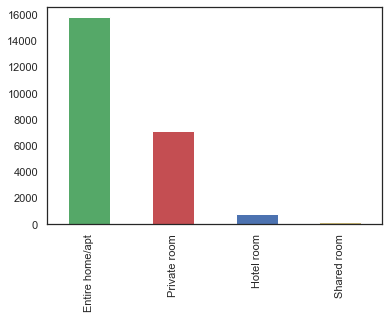

In [32]:
df['room_type'].value_counts().plot(kind = 'bar', color = ['g', 'r', 'b', 'y'])

In [33]:
apt = df[df['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_id,host_name,neighbourhood,apartment
3263,23532561,IFlat,I Centro Storico,154
6173,96122546,CleanBnB Team,I Centro Storico,82
5434,63191555,Halldis,I Centro Storico,51
623,2405376,Lorenzo,I Centro Storico,51
8208,224869116,Sonder (Rome),I Centro Storico,48
90,316068,Federico,I Centro Storico,38
2954,20428282,Nicoletta,I Centro Storico,36
291,1107433,WonderWhereToStay,I Centro Storico,36
356,1369759,Angelo,I Centro Storico,33
2328,13766340,Andreas,I Centro Storico,33


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'I Centro Storico'),
  Text(1, 0, 'VII San Giovanni/Cinecittà'),
  Text(2, 0, 'II Parioli/Nomentano'),
  Text(3, 0, 'XIII Aurelia'),
  Text(4, 0, 'XII Monte Verde')])

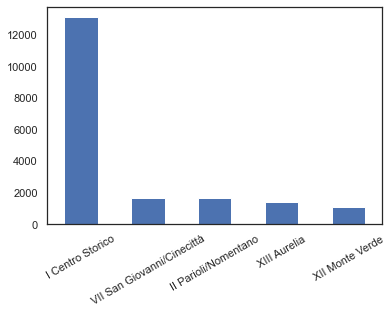

In [34]:
dist_plt = df['neighbourhood'].value_counts().nlargest(5).plot.bar()
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'I Centro Storico'),
  Text(1, 0, 'XIII Aurelia'),
  Text(2, 0, 'XV Cassia/Flaminia'),
  Text(3, 0, 'II Parioli/Nomentano'),
  Text(4, 0, 'XII Monte Verde')])

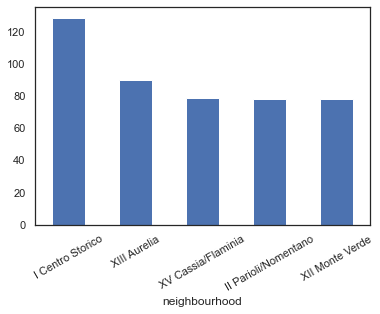

In [35]:
mode_dist_plt = df.groupby('neighbourhood')['price'].median().nlargest(5).plot.bar()
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'XI Arvalia/Portuense'),
  Text(1, 0, 'I Centro Storico'),
  Text(2, 0, 'II Parioli/Nomentano'),
  Text(3, 0, 'XIII Aurelia'),
  Text(4, 0, 'XV Cassia/Flaminia')])

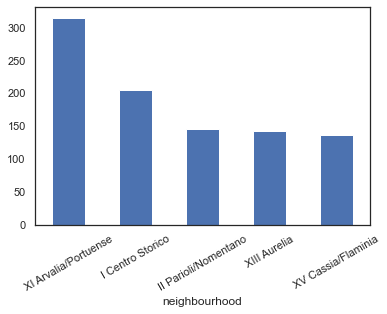

In [36]:
mean_dist_plt = df.groupby('neighbourhood')['price'].mean().nlargest(5).plot.bar()
plt.xticks(rotation = 30)

In [37]:
df['price'].describe()

count    23906.000000
mean       166.673848
std        846.444347
min          0.000000
25%         65.000000
50%        100.000000
75%        157.000000
max      90963.000000
Name: price, dtype: float64

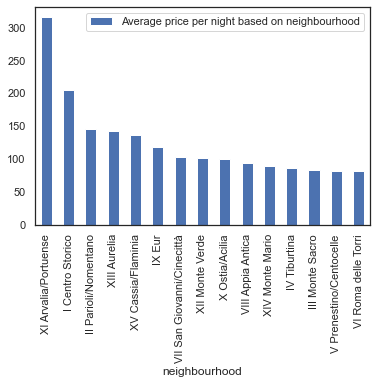

,Average price per night based on neighbourhood
neighbourhood,
XI Arvalia/Portuense,315.661538
I Centro Storico,205.781338
II Parioli/Nomentano,146.295732
XIII Aurelia,143.172439
XV Cassia/Flaminia,136.271222
IX Eur,118.437870
VII San Giovanni/Cinecittà,102.632836
XII Monte Verde,100.791139
X Ostia/Acilia,99.659446


In [38]:
df_mean_dist = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
        ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df_mean_dist.plot(kind='bar')
plt.show()
pd.DataFrame(df_mean_dist)

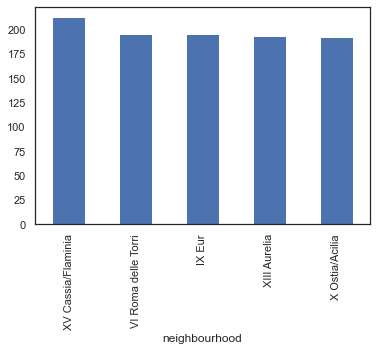

In [39]:
df5 = df.groupby('neighbourhood')['availability_365'].mean().nlargest(5).plot.bar()

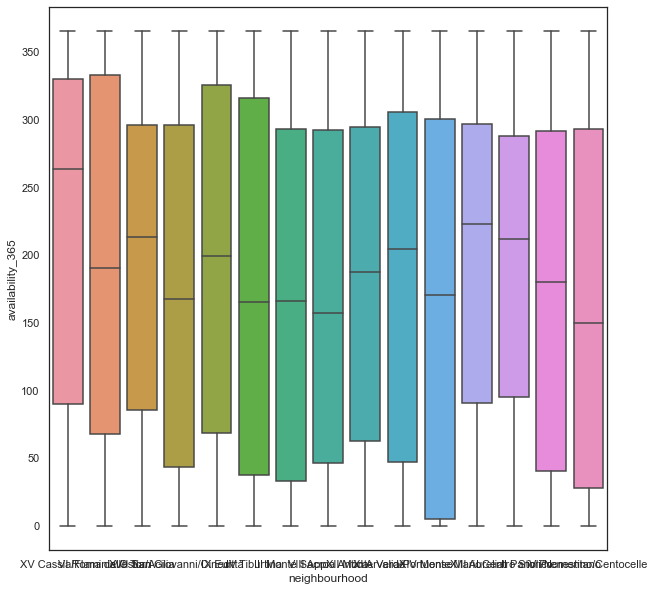

In [40]:


plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood',y='availability_365')

In [42]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df[c].value_counts()[1]
amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df[c].value_counts()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Most Frequent Amenities", labels={
	"y": "Count",
	"x": "Amenities"
})
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [43]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df[c].value_counts()[1]
amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df.groupby(c)['price'].mean()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Average Price for the Most Frequent Amenities", labels={
	"y": "Average Price",
	"x": "Amenities"
})
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [44]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df[c].value_counts()[1]
amenities_list = sorted(amenities, key=amenities.get, reverse=True)[10:35]
amenities = {c:df.groupby(c)['price'].mean()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Average Price for the Most Frequent Amenities", labels={
	"y": "Average Price",
	"x": "Amenities"
}, height=900, width=1000)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df.groupby(c)['price'].mean()[1]

amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df.groupby(c)['price'].mean()[1] for c in amenities_list}
amenities_count = {c:df[c].value_counts()[1] for c in amenities_list}

fig = make_subplots(
    rows=1, cols=2,
)

fig.add_trace(
	go.Bar(x = list(amenities.keys()), y = list(amenities.values())), row=1, col=1
)
fig.add_trace(
	go.Bar(x = list(amenities_count.keys()), y = list(amenities_count.values())), row=1, col=2
)
fig.update_layout(title_text="Highest Price Amenities and Their Count")
fig.show()

In [ ]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df[c].value_counts()[1]
amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df.groupby(c)['number_of_reviews_ltm'].mean()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Total Number of Reviews for The Most Frequent Amenities", labels={
	"y": "Number of Reviews",
	"x": "Amenities"
})
fig.show()

In [ ]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df.groupby(c)['price'].mean()[1]

amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df.groupby(c)['number_of_reviews_ltm'].mean()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Total Number of Reviews for The Most Expensive Amenities", labels={
	"y": "Number of Reviews",
	"x": "Amenities"
})
fig.show()

# -------------------------------------------------------------------------

### what is the income of the past year and the expected income for the next 3 months?

- more data cleaning

In [ ]:
romeListings = df2.copy()
romeListings.at[19678,"minimum_minimum_nights"]=7
romeListings.drop(14443,inplace=True)
romeListings.drop(7022,inplace=True)
romeListings.at[5888,"minimum_minimum_nights"]=3
romeListings.drop(7250,inplace=True)
romeListings.at[11454,"minimum_minimum_nights"]=5
romeListings.at[20461,"price"]=romeListings.sort_values("price",ascending=False).drop(20461).groupby("neighbourhood_cleansed").mean().at["XI Arvalia/Portuense","price"]
romeListings.at[20421,"price"]=121.51
romeListings.at[8105,"price"]=romeListings.sort_values("price",ascending=False).drop(8105).groupby("neighbourhood_cleansed").mean().at["I Centro Storico","price"]
romeListings.at[14207,"price"]=romeListings.sort_values("price",ascending=False).drop(8105).groupby("neighbourhood_cleansed").mean().at["I Centro Storico","price"]
romeListings.drop(18549,inplace=True)
romeListings.at[23230,"price"]=90
romeListings.at[9646,"price"]=92.73
romeListings.at[4737,"minimum_minimum_nights"]=3
romeListings.drop(romeListings[romeListings["price"]==0].index,inplace=True)

- add min_booked_nights_past_12m and min_income_past_12m column to the dataset

In [ ]:
#the minimum estmtation of the number of booked nights of each listing in the last 12 month (current date = 2022-06-07)
romeListings["min_booked_nights_past_12m"]=romeListings.apply(lambda x : x["number_of_reviews_ltm"]*x["minimum_nights_avg_ntm"],axis=1)

#the minimum estmtation of the income of each listing in the last 12 month (current date = 2022-06-07)
romeListings["min_income_past_12m"]=romeListings.apply(lambda x : x["min_booked_nights_past_12m"]*x["price"],axis=1)


- add expected_booked_nights_coming_3m and expected_income_coming_3m column to the dataset

In [ ]:
#the expected number of booked nights of each listing in the next 3 month (current date = 2022-06-07)
romeListings["expected_booked_nights_coming_3m"]=romeListings.apply(lambda x : 90-x["availability_90"],axis=1)

#the expected income of each listing  in the next 3 month (current date = 2022-06-07)
romeListings["expected_income_coming_3m"]=romeListings.apply(lambda x : (90-x["availability_90"])*x["price"],axis=1)

#### what neighbourhoods have highest averege price ?

In [ ]:
temp=romeListings.groupby("neighbourhood_cleansed")["price"].mean().sort_values(ascending=False).head(5).reset_index()
fig = px.bar(temp,x = "neighbourhood_cleansed", y = "price", title = "The highest price per night average of listings within a neighbourhood",color="neighbourhood_cleansed", labels={
	"y": "Price",
	"x": "Neighbourhood"
})
fig.show()


#### what neighbourhoods have highest averege of booked nights over the next 3 month ?

In [ ]:
temp=romeListings.groupby("neighbourhood_cleansed")["expected_booked_nights_coming_3m"].mean().sort_values(ascending=False).head(50).reset_index()
fig = px.bar(temp,x = "neighbourhood_cleansed", y = "expected_booked_nights_coming_3m", title = "The highest booked nights average of listings within a neighbourhood",color="neighbourhood_cleansed", labels={
	"y": "Booked nights (next 3 months)",
	"x": "Neighbourhood"
},range_y=[0,90])
fig.show()

#### what room types have highest averege price ?

In [ ]:
temp=romeListings.groupby("room_type")["price"].mean().sort_values(ascending=False).head(5).reset_index()
fig = px.bar(temp,x = "room_type", y = "price", title = "The highest price per night average of listings of a room type  ",color="room_type", labels={
	"y": "Price",
	"x": "Room Type"
})
fig.show()

#### what room types have highest averege of booked nights over the next 3 month ?

In [ ]:
temp=romeListings.groupby("room_type")["expected_booked_nights_coming_3m"].mean().sort_values(ascending=False).reset_index()
fig = px.bar(temp,x = 'room_type', y = "expected_booked_nights_coming_3m", title = "The highest booked nights average of listings of a room type",color="room_type", labels={
	"y": "Booked nights (next 3 months)",
	"x": "Room Type"
},range_y=[0,90])
fig.show()

#### what (room type ,neighbourhood) combinations have the highest averege booked nights ?

In [ ]:
nBookedNightinNigh=romeListings.groupby(["room_type","neighbourhood_cleansed"])["expected_booked_nights_coming_3m"].agg(["mean","count"])
temp=nBookedNightinNigh[nBookedNightinNigh["count"]>11]["mean"].sort_values(ascending=False).head(5)
fig = px.bar(x = list(map(str,list(temp.keys()))), y = temp.values, title = "The highest booked nights average of listings for every (Room Type,Neighbourhood) combination", labels={
	"y": "Booked nights (next 3 months)",
	"x": "(Room Type,Neighbourhood)"
},range_y=[0,90])
fig.show()


#### what neighbourhoods have highest minumam income average for the past 12 months ?


In [ ]:

temp=romeListings.groupby("neighbourhood_cleansed")["min_income_past_12m"].mean().sort_values(ascending=False).head(5).reset_index()
fig = px.bar(temp,x = "neighbourhood_cleansed", y = "min_income_past_12m", title = "The highest minimum income of listings within a Neighbourhood",color="neighbourhood_cleansed", labels={
	"y": "average minimum income of listings (past 12 months)",
	"x": "Neighbourhood"
})

fig.show()

#### what neighbourhoods with the highest expected income average for the next 3 months ?

In [ ]:
temp= romeListings.groupby("neighbourhood_cleansed")["expected_income_coming_3m"].mean().sort_values(ascending=False).head(5).reset_index()
fig = px.bar(temp,x = "neighbourhood_cleansed", y = "expected_income_coming_3m", title = "The highest expected income of listings within a Neighbourhood",color="neighbourhood_cleansed", labels={
	"y": "average expected income of listings (next 3 months)",
	"x": "Neighbourhood"
})

fig.show()

#### what room types have highest minumam income average for the past 12 months ?


In [ ]:
temp=romeListings.groupby("room_type")["min_income_past_12m"].mean().sort_values(ascending=False).head(5).reset_index()
fig = px.bar(temp,x = "room_type", y = "min_income_past_12m", title = "The highest minimum income of listings based on room type",color="room_type", labels={
	"y": "average minimum income of listings (past 12 months)",
	"x": "Room Type"
})

fig.show()


#### what room types have highest expected income average for the next 3 months ?

In [ ]:
temp=romeListings.groupby("room_type")["expected_income_coming_3m"].mean().sort_values(ascending=False).head(5).reset_index()
fig = px.bar(temp,x = "room_type", y = "expected_income_coming_3m", title = "The highest expected income of listings based on room type",color="room_type", labels={
	"y": "average expected income of listings (next 3 months)",
	"x": "Room Type"
})

fig.show()

#### what (room type ,neighbourhood) combinations have the highest averege income ?

In [ ]:
nBookedNightinNigh=romeListings.groupby(["room_type","neighbourhood_cleansed"])["expected_income_coming_3m"].agg(["mean","count"])
temp=nBookedNightinNigh[nBookedNightinNigh["count"]>11]["mean"].sort_values(ascending=False).head(5)
fig = px.bar(x = list(map(str,list(temp.keys()))), y = temp.values, title = "The highest income average of listings for every (Room Type,Neighbourhood) combination", labels={
	"y": "average income (next 3 months)",
	"x": "(Room Type,Neighbourhood)"
},)
fig.show()


# ------------------------------------------------------------------------------------------

## does the host's account appearance effects the listing income ?

In [ ]:
temp=romeListings.groupby("host_has_profile_pic")["expected_income_coming_3m"].mean().reset_index()
fig = px.bar(temp,x = ["No","Yes"], y = "expected_income_coming_3m", title = "",color=["No","Yes"], labels={
	"y": "average income (next 3 months)",
	"x": "host has a profile pic ?"
})
fig.show()


In [ ]:
temp= romeListings.groupby("host_identity_verified")["expected_income_coming_3m"].mean().reset_index()
fig = px.bar(temp,x = ["No","Yes"], y = "expected_income_coming_3m", title = "",color=["No","Yes"], labels={
	"y": "average income (next 3 months)",
	"x": "is the host identity verified ?"
},)
fig.show()

In [ ]:
temp= romeListings.groupby("instant_bookable")["expected_income_coming_3m"].mean()
fig = px.bar(temp,x = ["No","Yes"], y = "expected_income_coming_3m", title = "",color=["No","Yes"], labels={
	"y": "average income (next 3 months)",
	"x": "can be booked instantly ?"
},)
fig.show()

#### does the response time effects the the densisty of the number of the booked nights ?

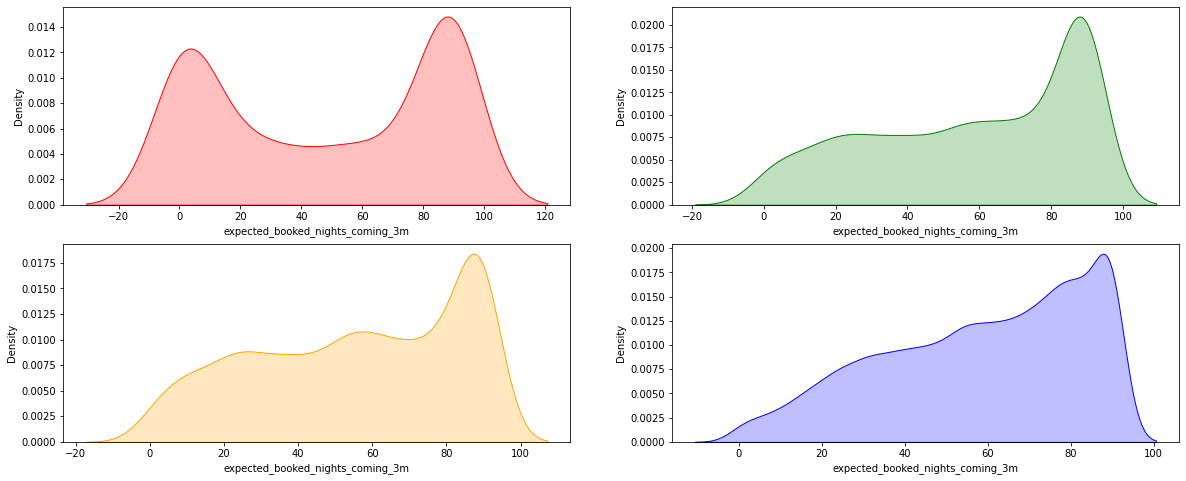

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(20,8))
ax = sns.kdeplot(romeListings[romeListings["host_response_time"]=="a few days or more"]["expected_booked_nights_coming_3m"],x="expected_booked_nights_coming_3m",color="red", fill=True,ax=axes[0,0])
ax = sns.kdeplot(romeListings[romeListings["host_response_time"]=="within a day"]["expected_booked_nights_coming_3m"],x="expected_booked_nights_coming_3m",color="green", fill=True,ax=axes[0,1])
ax = sns.kdeplot(romeListings[romeListings["host_response_time"]=="within a few hours"]["expected_booked_nights_coming_3m"],x="expected_booked_nights_coming_3m",color="orange",  fill=True,ax=axes[1,0])
ax = sns.kdeplot(romeListings[romeListings["host_response_time"]=="within an hour"]["expected_booked_nights_coming_3m"],x="expected_booked_nights_coming_3m",color="blue",  fill=True,ax=axes[1,1])

In [45]:
review_col =[i for i in df2.columns if 'review_scores' in i]
review_col.append('price')

corr = df2[review_col].corr()

In [46]:
review_col.append('price')


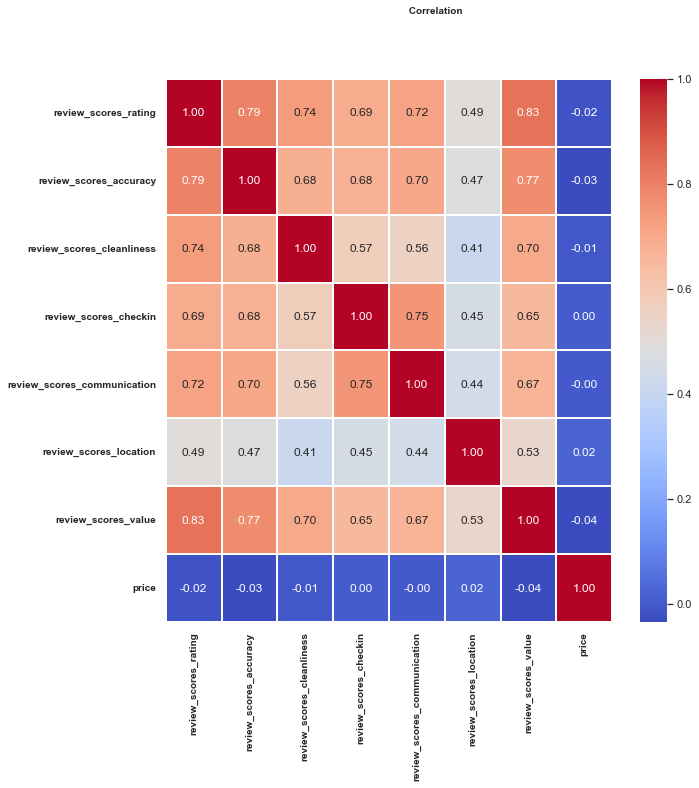

In [47]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,10))
hm = sns.heatmap(corr, 
                 ax=ax,           
                 cmap="coolwarm", 
                 annot=True, 
                 fmt='.2f',       
                 linewidths=.05)
fig.suptitle(' Correlation ', 
              fontsize=10, 
              fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize = 10, fontweight='bold')
ax.set_yticklabels(ax.get_xticklabels(), fontsize = 10, fontweight='bold')
plt.show()


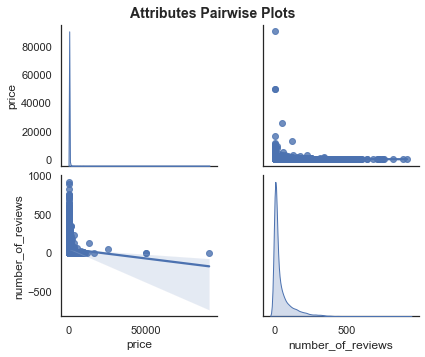

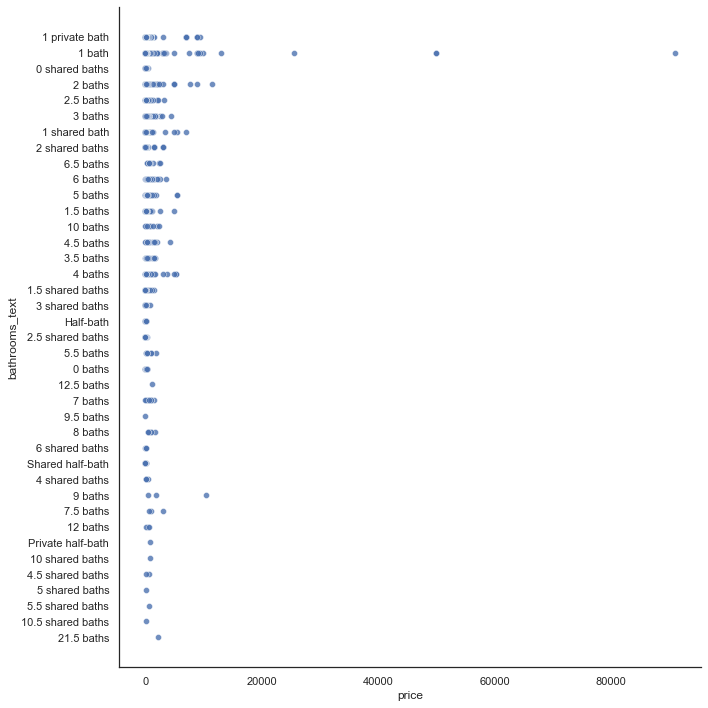

In [48]:

eds = df2[[ 'price', 'number_of_reviews', ]]

g = sns.pairplot(eds,
                 aspect=1.2,
                 diag_kws=dict(shade=True),
                 diag_kind="kde", kind="reg")
fig = g.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Attributes Pairwise Plots', 
              fontsize=14, fontweight='bold');

sns.set(style="white")
sns.relplot(x="price", y="bathrooms_text",
            sizes=(40, 400), alpha=.8, palette="coolwarm",
            height=10, data=df2)


<Figure size 1080x576 with 0 Axes>

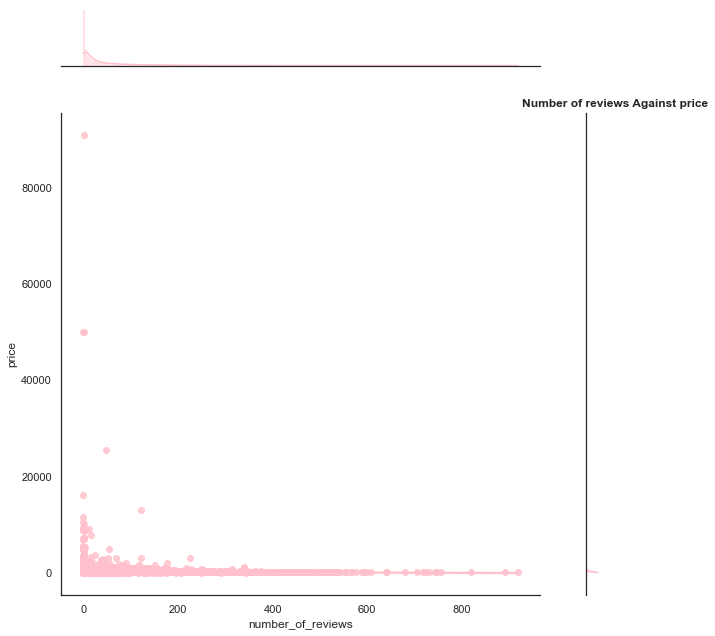

In [49]:
plt.figure(figsize=(15,8))
sns.jointplot( x='number_of_reviews',y ='price',data = df2, kind = 'reg', color = 'pink' , space = 0.8, height = 9)
plt.title('Number of reviews Against price', 
              fontsize=12, fontweight='bold');

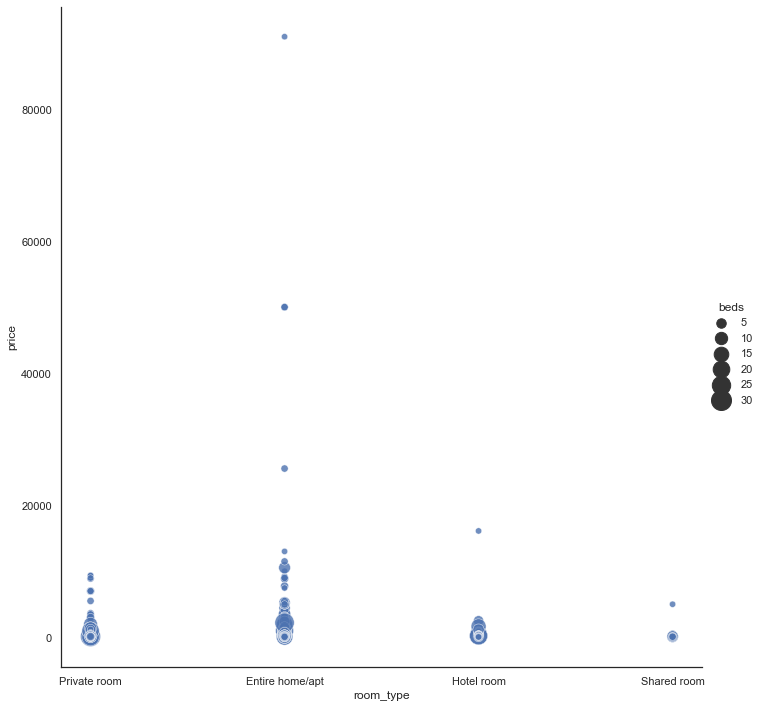

In [50]:
sns.set(style="white")
sns.relplot(x="room_type", y="price", size = 'beds',
            sizes=(40, 400), alpha=.8, palette="coolwarm",
            height=10, data=df2)

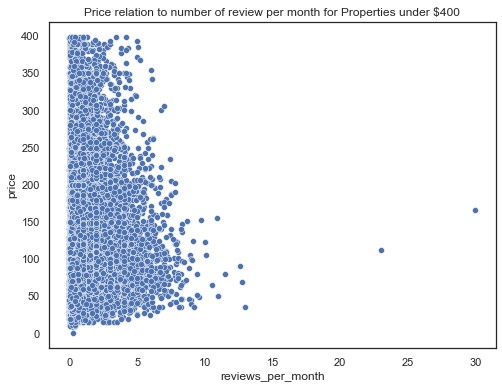

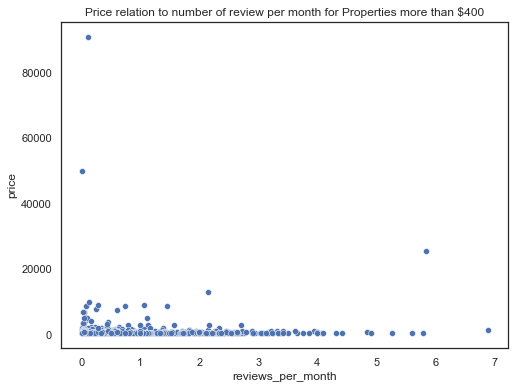

In [51]:

sns.set_palette("deep")
x = 'reviews_per_month'
y = 'price'

title = 'Price relation to number of review per month for Properties under $400'
data_filtered = df2.loc[(df2['price'] < 400) & (df2['reviews_per_month'] < 30)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number of review per month for Properties more than $400'
data_filtered = df2.loc[df2['price'] > 400]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()


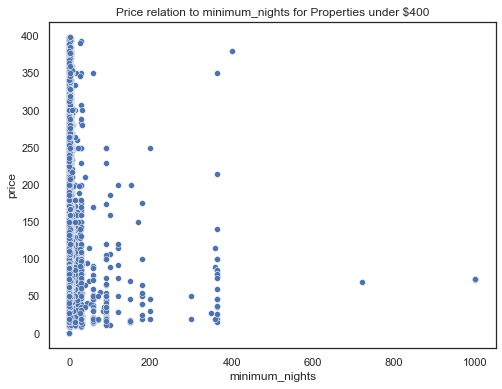

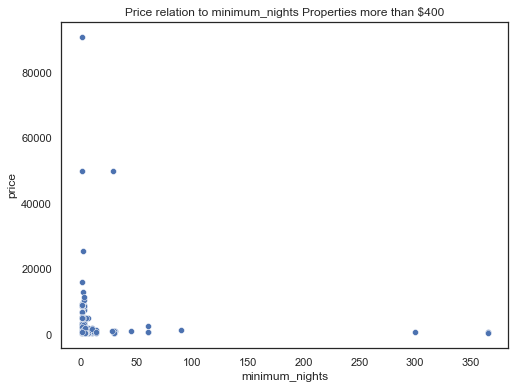

In [52]:
sns.set_palette("deep")
x = 'minimum_nights'
y = 'price'

title = 'Price relation to minimum_nights for Properties under $400'
data_filtered = df2.loc[df2['price'] < 400]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to minimum_nights Properties more than $400'
data_filtered = df2.loc[df2['price'] > 400]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

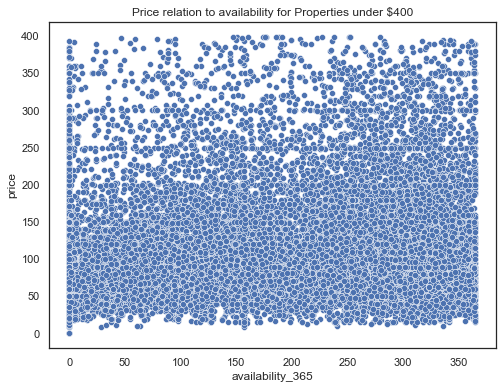

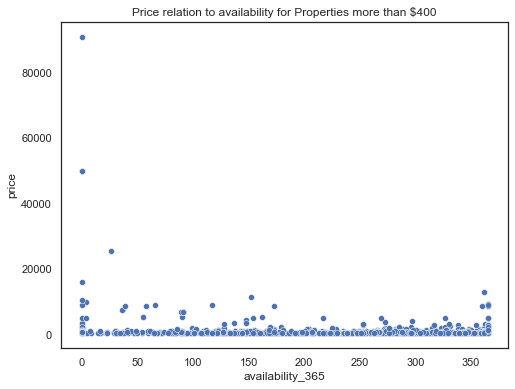

In [53]:
sns.set_palette("deep")
x = 'availability_365'
y = 'price'

title = 'Price relation to availability for Properties under $400'
data_filtered = df2.loc[df2['price'] < 400]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to availability for Properties more than $400'
data_filtered = df2.loc[df2['price'] > 400]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
